In [3]:
# import the module build in a different folder

import numpy as np
import importlib.util
import os
import matplotlib.pyplot as plt

import sys

sys.path.append(
    r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\scattering_structure"
)

sys.path.insert(0,
    r".\Scattering-Structures\scattering_structure"
)

from scattering_structure import ScatteringStructure

# Add the DLL directory
import imp

os.add_dll_directory("C:\\Program Files\\Lumerical\\v231\\api\\python")
lumapi = imp.load_source("lumapi", "C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py")


# Define the module name and file path
module_name = "lumapi"
#file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"
file_path = "C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py"

def load_module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

# Load the module
lumapi = load_module_from_file(module_name, file_path)

C:\Users\RamakrishnaVenkitakr\AppData\Local\Temp\ipykernel_12080\3195009883.py:21: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


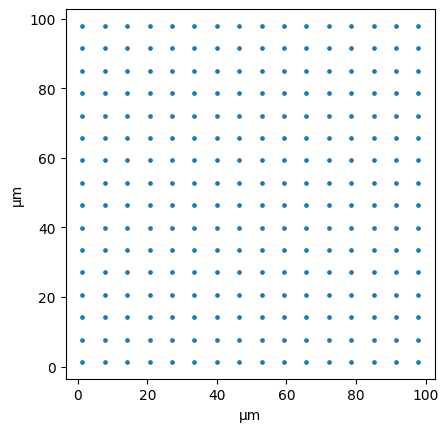

Density =  0.14505805947019715 /um^2


In [5]:
rect = ScatteringStructure(geometry={'type': 'box', 'lx': 100, 'ly': 100},
                           arrangement={'type':'rectangular', 'dist': 6.44},
                           scatterer_radius=1.343
                           )
rect.plot_distribution()
rect_rms = rect.rms()
rect_density = rect.density()

# print for further use
print('Density = ', rect_density, '/um^2')


In [85]:
###### Check for -i = j for complex symbol

print(np.cos(np.deg2rad(90)) + 1j*np.sin(np.deg2rad(90)))

print(np.exp(1j*np.deg2rad(90)))

print(np.abs(np.exp(1j*np.deg2rad(90))))

(6.123233995736766e-17+1j)
(6.123233995736766e-17+1j)
1.0


In [6]:
def structure_factor(x,y,kx,ky):
    no_particle = len(x)*len(y)
    
    # kx = np.linspace(-1,1,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
    # ky = np.linspace(-1,1,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

    Kx, Ky,x_pos = np.meshgrid(kx,ky,x)
    Kx, Ky,y_pos = np.meshgrid(kx,ky,y)

    Argument = Kx*x_pos + Ky*y_pos


    print(np.shape(Argument))

    cosQ = np.sum(np.cos(Argument), axis = 2)
    sinQ = np.sum(np.sin(Argument), axis = 2)

    S = (cosQ**2 + sinQ**2)/no_particle
   
    return S

In [148]:
x, y = zip(*rect.points)

period = np.sqrt((max(x)*max(y))/(len(x))) # periodicity = total area/total number of particles
print('period = ' + str(period) + " um")
rad = 2*np.pi/period
angle = np.linspace(0,2*np.pi,150)
rx = rad*np.cos(angle)
ry = rad*np.sin(angle)

kx = np.linspace(-2*np.pi/period,2*np.pi/period,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/period,2*np.pi/period,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S = structure_factor(x,y,kx,ky)

period = 6.27558064516129 um
(500, 500, 961)


In [1]:
plt.pcolormesh(kx,ky,S, cmap = 'viridis',vmin=0, vmax=1) 
plt.plot(rx,ry,'g', label="Bz")
plt.colorbar(location="right")
plt.legend()

NameError: name 'plt' is not defined

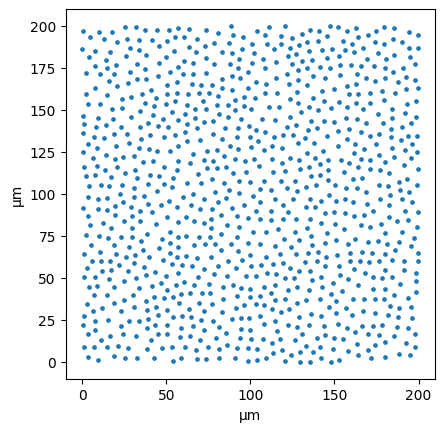

Mean of RMS(dist) =  0.13160052465606753 /um^2


In [21]:
pois = ScatteringStructure(geometry={'type': 'circle', 'lx': 200, 'ly': 200,
                                     'circle_radius': 90},
                           arrangement={'type':'poisson_disc', 'optimization': True,
                                        'measure_of_merit':'density',
                                        'target_mom': rect_density,
                                        'optimization_outer_n': 4,
                                        'optimization_inner_n': 8},
                           scatterer_radius=1.343
                           )
pois.plot_distribution()
pois_density = pois.density()

# print for further use
print('Mean of RMS(dist) = ', pois_density, '/um^2')

In [141]:
x, y = zip(*pois.points)

# period = np.sqrt((max(x)*max(y))/(len(x))) # periodicity = total area/total number of particles
period = 6.275 #from periodic
print('period = ' + str(period) + " um")
rad = 2*np.pi/period
angle = np.linspace(0,2*np.pi,150)
rx = rad*np.cos(angle)
ry = rad*np.sin(angle)

kx = np.linspace(-2*np.pi/period,2*np.pi/period,num=500) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/period,2*np.pi/period,num=500) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S = structure_factor(x,y,kx,ky)


period = 6.275 um
(500, 500, 929)


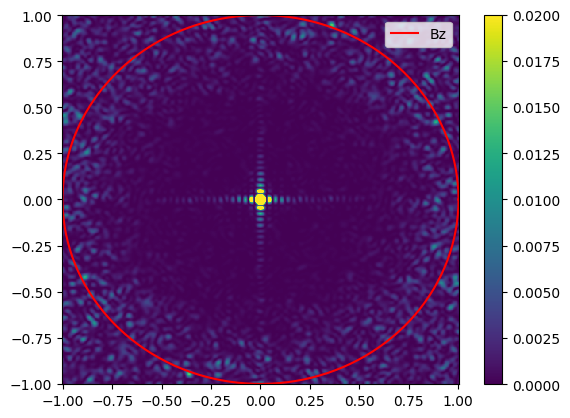

In [146]:
plt.pcolormesh(kx,ky,S, cmap = 'viridis', vmin=0, vmax=0.02) 
plt.plot(rx,ry,'r', label="Bz")
plt.colorbar(location="right")
plt.legend()

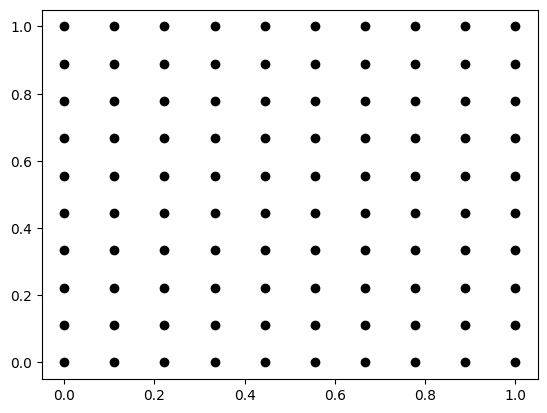

In [9]:
nx, ny = (10, 10)
xv = np.linspace(0, 1, nx)
yv = np.linspace(0, 1, ny)
x, y = np.meshgrid(xv, yv)

plt.figure()
plt.scatter(x,y,color='k')

In [20]:
# period = np.sqrt((max(x)*max(y))/(len(x))) # periodicity = total area/total number of particles
period = 10 #from periodic
print('period = ' + str(period) + " um")
rad = 2*np.pi/period
angle = np.linspace(0,2*np.pi,200)
rx = rad*np.cos(angle)
ry = rad*np.sin(angle)

kx = np.linspace(-2*np.pi/period,2*np.pi/period,num=200) #np.linspace(-2*np.pi/max(x),2*np.pi/max(x),num = len(x), endpoint=True)
ky = np.linspace(-2*np.pi/period,2*np.pi/period,num=200) #np.linspace(-2*np.pi/max(y),2*np.pi/max(y),num = len(x), endpoint=True)

S_test = structure_factor(x,y,kx,ky)

period = 10 um
(500, 500, 100)


TypeError: Dimensions of C (500, 500) should be one smaller than X(200) and Y(200) while using shading='flat' see help(pcolormesh)

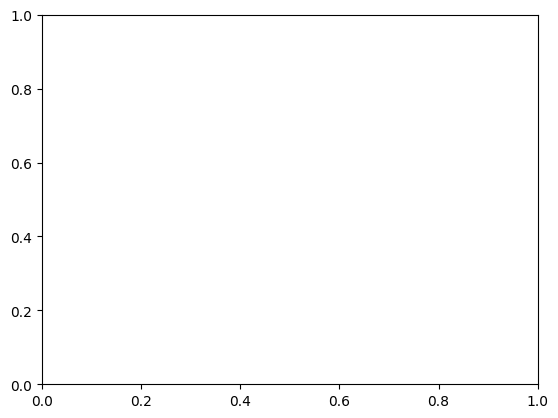

In [21]:
plt.pcolormesh(kx,ky,S_test, cmap = 'viridis', vmin=0, vmax=1) 
plt.plot(rx,ry,'r', label="Bz")
plt.colorbar(location="right")
plt.legend()